# Assignment 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib.backends.backend_pdf import PdfPages
from numpy.linalg import norm

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing

My Roll Number is 170120
Hence, value of R is 0

In [3]:
omega = 2*np.pi*2
tfinal = 1
sample_freq = 128
Ts = 1/sample_freq

#We have to create two arrrays, one for x axis(n) and other for y axis(sampled_angle).


In [4]:
def angle(omega,t):
    return (omega*t)%np.pi

In [5]:
def test_angle():
    x = angle(2*np.pi, 2)
    assert x==0                # assert that your method returns the correct answer.
                               # If not, this statement will give an assertion error.
    print('Test passed', '\U0001F44D')
    
# Please do not call any function without using "if __name__=="__main__":" statement. 
# Otherwise, it will be difficult for the TAs to compile
if __name__=="__main__":
    test_angle()

Test passed 👍


In [6]:
def sampled_angle(omega,sampling_frequency,tfinal):
    Ts = 1/sampling_frequency
    
    ts = np.arange(0,tfinal,Ts)
    xs = np.array([angle(omega, t) for t in ts])
    
    return xs, ts
    

## Part (a)

In [7]:
def normalize(data):
    denom = data.max() - data.min()
    data = data/denom
    
    return data

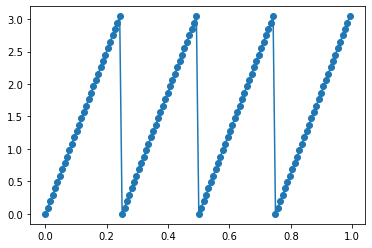

In [8]:
xs,ts = sampled_angle(omega,sample_freq,tfinal)
plt.plot(ts,xs,'o-')
plt.show()

## Part (b)

In [9]:
data = [['time','sampled_data']]
for i in range(len(ts)):
    data.append([ts[i],xs[i]])

with open('data.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(data)          #entering 'data' as a csv file
    
csvFile.close()

Reading the data from csv file and randomize the data

In [10]:
data_set = pd.read_csv('data.csv')  #data_set is a dataframe/textparser: A comma-separated values (csv) file is 
                                    #returned as two-dimensional data structure with labeled axes.

#print(data_set)
data_set.info(verbose = True)       #information about the dataframe

np.random.seed(2)                   
data_set = shuffle(data_set)       #randomize the data

data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
time            128 non-null float64
sampled_data    128 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB


,time,sampled_data
92,0.718750,2.748894
36,0.281250,0.392699
12,0.093750,1.178097
3,0.023438,0.294524
30,0.234375,2.945243


In [11]:
x = data_set.time     #we divide them into labels and features (y and x)
y = data_set.sampled_data
# p = data_set.drop('0.0',axis=1)
# print(p)
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.079,shuffle = False, stratify = None)
x_train.head()

92    0.718750
36    0.281250
12    0.093750
3     0.023438
30    0.234375
Name: time, dtype: float64

In [12]:
x_train.shape

(10,)

In [13]:
x_test.head()

2      0.015625
112    0.875000
28     0.218750
48     0.375000
125    0.976562
Name: time, dtype: float64

In [14]:
x_test.shape

(118,)

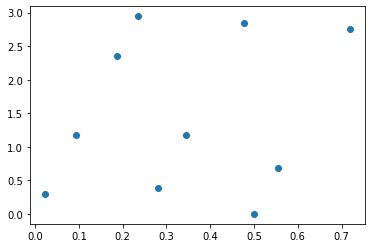

In [15]:
plt.plot(x_train,y_train,'o')
plt.show()

In [16]:
# because of shuffling, the index of the items in the Dataframes has also been randmized
# hence we need to reset the indices for future reference
y_train = y_train.reset_index()
del y_train['index']
print(y_train.head())

x_train = x_train.reset_index()
del x_train['index']
print(x_train.head())


   sampled_data
0      2.748894
1      0.392699
2      1.178097
3      0.294524
4      2.945243
       time
0  0.718750
1  0.281250
2  0.093750
3  0.023438
4  0.234375


In [17]:
y_test = y_test.reset_index()
del y_test['index']
print(y_test.head())

x_test = x_test.reset_index()
del x_test['index']
print(x_test.head())


   sampled_data
0      0.196350
1      1.570796
2      2.748894
3      1.570796
4      2.847068
       time
0  0.015625
1  0.875000
2  0.218750
3  0.375000
4  0.976562


In [18]:
M = [5, 11, 20]                   # The size of our model    

In [19]:
def generate_phi(training_set,M):
    phi = np.zeros([M+1,training_set.size])           #Actual phi matrix should be the transpose of this phi
    for i in range(M+1):
        for j in range(training_set.size):
            temp = training_set.at[j,'time']
            phi[i][j] = np.power(temp,i)
    phi = phi.T
    return phi

# Part (d)

In [20]:
def random_optimal_weights(M):
    np.random.seed(2)
    out_arr = np.random.randint(-2,2,(M+1,1)) 
    return out_arr

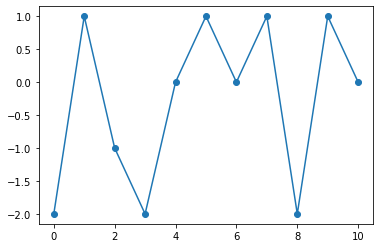

In [21]:
w8 = random_optimal_weights(10)

plt.plot(w8,'o-')
plt.show()

In [22]:
def least_square_error(actual_output,current_output):
    a = actual_output - current_output
    Err = (a.T).dot(a)
    return Err.at['sampled_data','sampled_data']

print(least_square_error(y_train,y_train))          #just for checking

0.0


In [23]:
def gradient_optimal_weights(training_set,actual_output,learning_rate,M):
    w = random_optimal_weights(M)
    
    phi = generate_phi(training_set,M)
    output = phi.dot(w)
    
    for i in range(len(w)):
        Err = least_square_error(actual_output,output)
        w[i] = w[i] - learning_rate*(Err)/(w[i]+0.001)                  #for the case when w becomes zero
        while(True):
            Err1 = least_square_error(actual_output,output)
            w[i] = w[i] - learning_rate*(Err-Err1)/(w[i]+0.001)
            if((Err-Err1)>0.001):
                Err = Err1
            else:
                break
    return w
                

# g = 0.5*np.ones((5+1,1))
# print(g[0])

In [24]:
w_0 = gradient_optimal_weights(x_train,y_train,0.01,M[0])
w_1 = gradient_optimal_weights(x_train,y_train,0.01,M[1])
w_2 = gradient_optimal_weights(x_train,y_train,0.01,M[2])

In [25]:
def output(training_set,w,M):
    phi = generate_phi(training_set,M)
    return phi.dot(w)

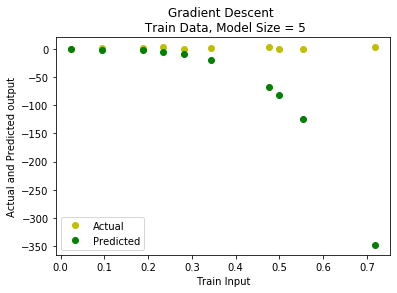

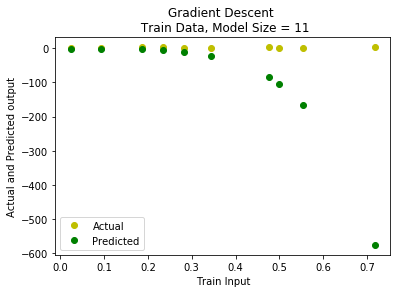

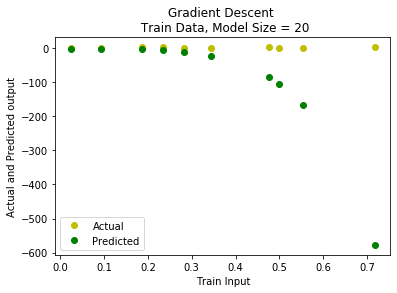

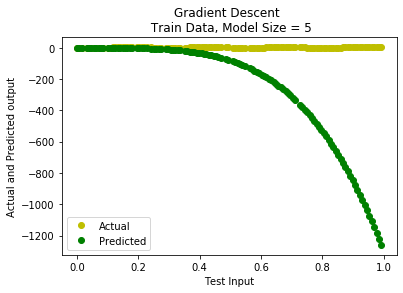

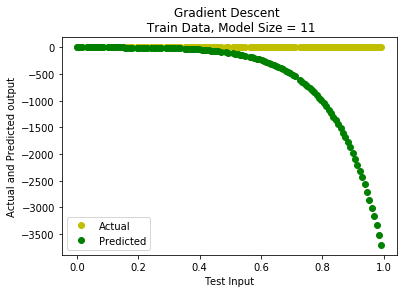

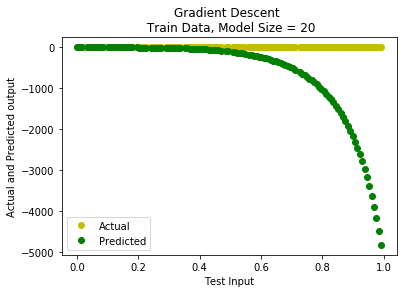

In [27]:
with PdfPages('plot_d.pdf') as pdf:
    train1 = output(x_train,w_0,M[0])
    plt.plot(x_train,y_train,'yo',x_train,train1,'go')
    plt.legend(['Actual','Predicted'])
    plt.title('Gradient Descent \n Train Data, Model Size = 5')
    plt.ylabel('Actual and Predicted output')
    plt.xlabel('Train Input')
    pdf.savefig()
    plt.show()

    train2 = output(x_train,w_1,M[1])
    plt.plot(x_train,y_train,'yo',x_train,train2,'go')
    plt.legend(['Actual','Predicted'])
    plt.title('Gradient Descent \n Train Data, Model Size = 11')
    plt.ylabel('Actual and Predicted output')
    plt.xlabel('Train Input')
    pdf.savefig()
    plt.show()

    train3 = output(x_train,w_2,M[2])
    plt.plot(x_train,y_train,'yo',x_train,train3,'go')
    plt.legend(['Actual','Predicted'])
    plt.title('Gradient Descent \n Train Data, Model Size = 20')
    plt.ylabel('Actual and Predicted output')
    plt.xlabel('Train Input')
    pdf.savefig()
    plt.show()

    test1 = output(x_test,w_0,M[0])
    plt.plot(x_test,y_test,'yo',x_test,test1,'go')
    plt.legend(['Actual','Predicted'])
    plt.title('Gradient Descent \n Train Data, Model Size = 5')
    plt.ylabel('Actual and Predicted output')
    plt.xlabel('Test Input')
    pdf.savefig()
    plt.show()

    test2 = output(x_test,w_1,M[1])
    plt.plot(x_test,y_test,'yo',x_test,test2,'go')
    plt.legend(['Actual','Predicted'])
    plt.title('Gradient Descent \n Train Data, Model Size = 11')
    plt.ylabel('Actual and Predicted output')
    plt.xlabel('Test Input')
    pdf.savefig()
    plt.show()

    test3 = output(x_test,w_2,M[2])
    plt.plot(x_test,y_test,'yo',x_test,test3,'go')
    plt.legend(['Actual','Predicted'])
    plt.title('Gradient Descent \n Train Data, Model Size = 20')
    plt.ylabel('Actual and Predicted output')
    plt.xlabel('Test Input')
    pdf.savefig()
    plt.show()